In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
fr = session.query(Measurement).first()
print(fr.__dict__)

# fr = session.query(Station).first()
# print(fr.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fb53822c5e0>, 'prcp': 0.08, 'date': '2010-01-01', 'id': 1, 'tobs': 65.0, 'station': 'USC00519397'}


In [10]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
# print("12 months before most recent measurement: ",year_ago)


# Perform a query to retrieve the data and precipitation scores
most_recent = dt.date(2017,8,23)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).filter(Measurement.date <= most_recent).all()

date_results = []
for r in results:
    date_results.append(tuple([r.date,r.prcp]))


In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date_rows_df = pd.DataFrame(date_results, columns=["Date","Prcp"])

# Sort the dataframe by date
date_rows_df = date_rows_df.sort_values(by="Date")
date_rows_df.head()

,Date,Prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


Text(0.5, 1.0, 'Precipitation levels by date')

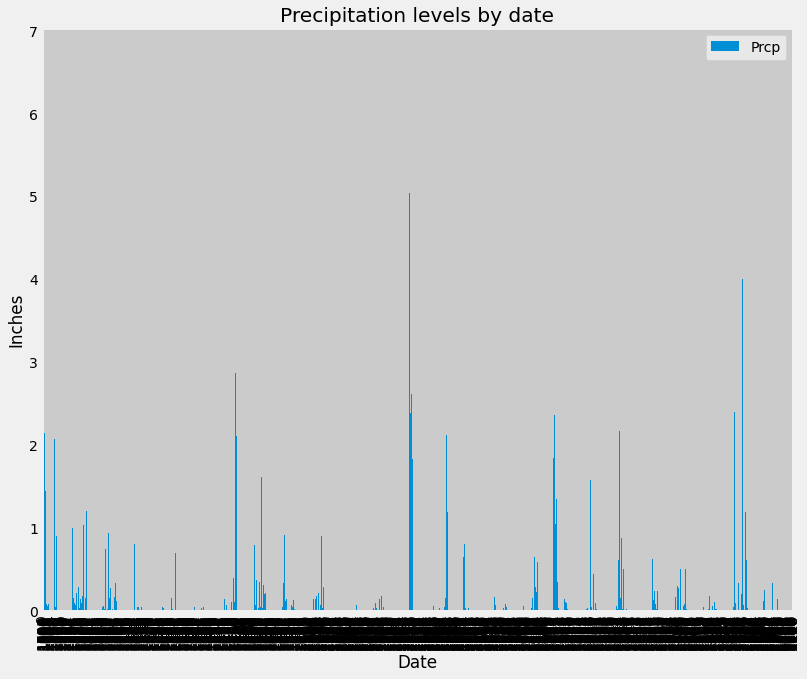

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data

df = date_rows_df

ax = df.plot(kind="bar",rot= 90,figsize=(12,10))
ax.set_ylabel("Inches")
ax.set_xlabel("Date")
ax.set_title("Precipitation levels by date")


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_rows_df["Prcp"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Prcp, dtype: float64

# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
# fr = session.query(Station).first()
# print(fr.__dict__)

session.query(func.count(Station.station)).all()

[(9)]

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

lowest = session.query(Measurement.tobs, func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
print("The lowest temperature for Station USC00519281: ",lowest[0][0])

highest = session.query(Measurement.tobs, func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
print("The highest temperature for Station USC00519281: ",highest[0][0])

avg = session.query(Measurement.tobs, func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
print("The average temperature for Station USC00519281: ",avg[0][0])

The lowest temperature for Station USC00519281:  54.0
The highest temperature for Station USC00519281:  85.0
The average temperature for Station USC00519281:  70.0


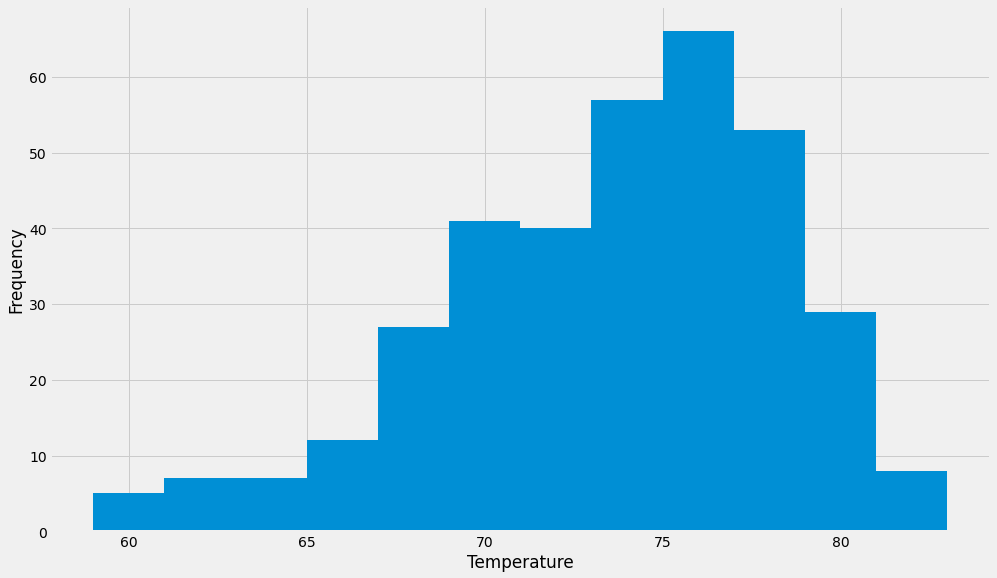

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_rows = []

results = session.query(Measurement).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= year_ago).filter(Measurement.date <= most_recent).all()
for r in results:
    station_rows.append(tuple([r.prcp,r.station,r.tobs,r.date,r.id]))


station_rows_df = pd.DataFrame(station_rows, columns=["Prcp","Station","TOBS","Date","ID"])


# Plotting histogram
plt.figure(figsize=(15,9))
plt.hist(station_rows_df["TOBS"],bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [19]:
# Close Session
session.close()